In [364]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ==========================
# 1. Chargement du dataset
# ==========================

In [365]:
# Charger le dataset
dataset = pd.read_csv("CarPrice_Assignment.csv")
dataset.head()


,car_ID,price,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
0,1,13495.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,3
1,2,16500.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,3
2,3,16500.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,1
3,4,13950.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,2
4,5,17450.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,2


In [366]:
# Sélection des features et de la cible
X = dataset[['wheelbase','carlength', 'carwidth','carheight','curbweight','enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','symboling']].values  # Matrice des variables explicatives
y = dataset['price'].values.reshape(-1, 1)  # Variable cible
X

array([[ 88.6, 168.8,  64.1, ...,  21. ,  27. ,   3. ],
       [ 88.6, 168.8,  64.1, ...,  21. ,  27. ,   3. ],
       [ 94.5, 171.2,  65.5, ...,  19. ,  26. ,   1. ],
       ...,
       [ 95.7, 166.3,  64.4, ...,  28. ,  34. ,   0. ],
       [ 95.7, 166.3,  64.4, ...,  28. ,  34. ,   0. ],
       [ 94.5, 168.7,  64. , ...,  29. ,  34. ,   1. ]], shape=(164, 14))

In [367]:
def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [368]:
# Séparer les données en ensemble d'entraînement et de test

#x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=13)
print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (131, 14)
x_test shape  :  (33, 14)
y_train shape  :  (131, 1)
y_test shape  :  (33, 1)


In [369]:
# Normalization de x_train
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm


array([[ 0.13452474,  0.40720408,  0.41253381, ...,  1.76080064,
         1.72295435, -0.82939897],
       [ 0.91664828,  1.31133519,  0.60215462, ..., -0.7670337 ,
        -0.82825531,  0.04682091],
       [ 1.14962125,  0.18117131,  0.22291301, ...,  0.97085241,
         1.27274088, -0.82939897],
       ...,
       [ 0.91664828,  1.69881994,  1.07620663, ..., -1.39899229,
        -1.27846878, -0.82939897],
       [ 2.33112702,  2.1347403 ,  3.01981988, ..., -1.71497158,
        -2.17889572,  0.04682091],
       [-0.34806212,  0.03586452,  0.31772341, ..., -0.92502335,
        -0.97832647,  1.79926066]], shape=(131, 14))

In [370]:
x_train_norm.mean()

np.float64(-1.232020665058407e-15)

In [371]:
x_train_norm.std()

np.float64(0.9999999999999999)

In [372]:
# Normalization de x_test
x_test_norm= (x_test - mean)/std
x_test_norm

array([[-0.7141625 , -1.24767874, -0.58297541, -1.05404763, -0.98095208,
        -0.76303898, -1.29983446, -0.02809009, -0.05530869, -0.90276267,
         0.78995984,  0.97085241,  1.12266972,  0.92304079],
       [-0.28149842,  0.01971933, -0.1089234 , -1.59782354, -0.30226913,
        -0.37476839, -0.55430769,  0.64096479, -0.65619615,  0.30194269,
         0.78995984, -0.29306476, -0.07789953,  1.79926066],
       [ 1.44915792,  1.1902462 ,  2.21393146,  0.53843896,  1.78384649,
         1.19988456,  0.97402219,  1.16457295,  3.77139569,  0.47762889,
        -1.72871634, -0.45105441, -0.82825531, -0.82939897],
       [ 1.29938959,  1.61002135,  2.73538867,  0.84916805,  0.78065667,
         0.18606691, -0.47975501,  0.46642873, -0.33993959,  0.15135452,
         0.78995984, -0.92502335, -0.82825531,  0.04682091],
       [-0.44790768, -0.30318464,  0.0332922 , -1.52014127, -0.28372588,
        -1.23759193,  0.04211373,  0.04463327, -0.05530869, -0.07452773,
         1.88503644, -1.24

In [373]:
X_test_norm_1 = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
X_test_norm_1

array([[-0.7141625 , -1.24767874, -0.58297541, -1.05404763, -0.98095208,
        -0.76303898, -1.29983446, -0.02809009, -0.05530869, -0.90276267,
         0.78995984,  0.97085241,  1.12266972,  0.92304079,  1.        ],
       [-0.28149842,  0.01971933, -0.1089234 , -1.59782354, -0.30226913,
        -0.37476839, -0.55430769,  0.64096479, -0.65619615,  0.30194269,
         0.78995984, -0.29306476, -0.07789953,  1.79926066,  1.        ],
       [ 1.44915792,  1.1902462 ,  2.21393146,  0.53843896,  1.78384649,
         1.19988456,  0.97402219,  1.16457295,  3.77139569,  0.47762889,
        -1.72871634, -0.45105441, -0.82825531, -0.82939897,  1.        ],
       [ 1.29938959,  1.61002135,  2.73538867,  0.84916805,  0.78065667,
         0.18606691, -0.47975501,  0.46642873, -0.33993959,  0.15135452,
         0.78995984, -0.92502335, -0.82825531,  0.04682091,  1.        ],
       [-0.44790768, -0.30318464,  0.0332922 , -1.52014127, -0.28372588,
        -1.23759193,  0.04211373,  0.04463327, 

In [374]:
x_train_norm_1 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
x_train_norm_1

array([[ 0.13452474,  0.40720408,  0.41253381, ...,  1.72295435,
        -0.82939897,  1.        ],
       [ 0.91664828,  1.31133519,  0.60215462, ..., -0.82825531,
         0.04682091,  1.        ],
       [ 1.14962125,  0.18117131,  0.22291301, ...,  1.27274088,
        -0.82939897,  1.        ],
       ...,
       [ 0.91664828,  1.69881994,  1.07620663, ..., -1.27846878,
        -0.82939897,  1.        ],
       [ 2.33112702,  2.1347403 ,  3.01981988, ..., -2.17889572,
         0.04682091,  1.        ],
       [-0.34806212,  0.03586452,  0.31772341, ..., -0.97832647,
         1.79926066,  1.        ]], shape=(131, 15))

# =============================================
# 2. Régression multiple avec descente de gradient
# =============================================

In [375]:

# Initialiser le vecteur theta aléatoirement
theta = np.random.randn(x_train_norm_1.shape[1], 1)
theta

array([[-0.21268975],
       [ 0.23533542],
       [ 1.19448088],
       [ 0.4047524 ],
       [ 0.91817102],
       [-0.37111312],
       [ 0.68833316],
       [ 2.46367462],
       [-2.11904003],
       [-0.95088437],
       [-0.25481602],
       [ 1.3375138 ],
       [ 0.03551186],
       [ 1.77731288],
       [ 1.0441422 ]])

In [376]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [377]:
cost_function(x_train_norm_1, y_train, theta)

np.float64(126448717.21388811)

In [378]:
# Paramètres de la descente de gradient
n_iterations = 1000
learning_rate = 0.03

#entrainement:
theta_final, cost_history = gradient_descent(x_train_norm_1, y_train, theta, learning_rate, n_iterations)

theta_final


array([[ 1695.72172079],
       [ -633.31055752],
       [ -173.51821827],
       [  395.45346883],
       [  922.12178379],
       [ 5551.25681021],
       [   64.43998704],
       [-1084.17559916],
       [ 1090.50787022],
       [ 1836.66596567],
       [ 1389.74725534],
       [ -760.88163034],
       [  768.72857462],
       [  919.27386363],
       [13380.35623664]])

In [379]:
cost_history

array([1.11345535e+08, 1.00056843e+08, 9.12937300e+07, 8.42308443e+07,
       7.83377853e+07, 7.32719556e+07, 6.88104552e+07, 6.48067833e+07,
       6.11633032e+07, 5.78137243e+07, 5.47119501e+07, 5.18249719e+07,
       4.91283364e+07, 4.66032477e+07, 4.42347114e+07, 4.20103404e+07,
       3.99195837e+07, 3.79532231e+07, 3.61030436e+07, 3.43616124e+07,
       3.27221300e+07, 3.11783258e+07, 2.97243841e+07, 2.83548897e+07,
       2.70647856e+07, 2.58493398e+07, 2.47041187e+07, 2.36249635e+07,
       2.26079706e+07, 2.16494739e+07, 2.07460291e+07, 1.98943991e+07,
       1.90915409e+07, 1.83345935e+07, 1.76208664e+07, 1.69478293e+07,
       1.63131024e+07, 1.57144469e+07, 1.51497568e+07, 1.46170507e+07,
       1.41144642e+07, 1.36402432e+07, 1.31927371e+07, 1.27703926e+07,
       1.23717479e+07, 1.19954273e+07, 1.16401360e+07, 1.13046553e+07,
       1.09878384e+07, 1.06886054e+07, 1.04059401e+07, 1.01388858e+07,
       9.88654198e+06, 9.64806075e+06, 9.42264398e+06, 9.20954022e+06,
      

In [380]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

predictions = model(X_test_norm_1, theta_final)
r2 = coef_determination(y_test, predictions)
print(f'R² Score (Descente de gradient): {r2}')

R² Score (Descente de gradient): 0.8644150322909777


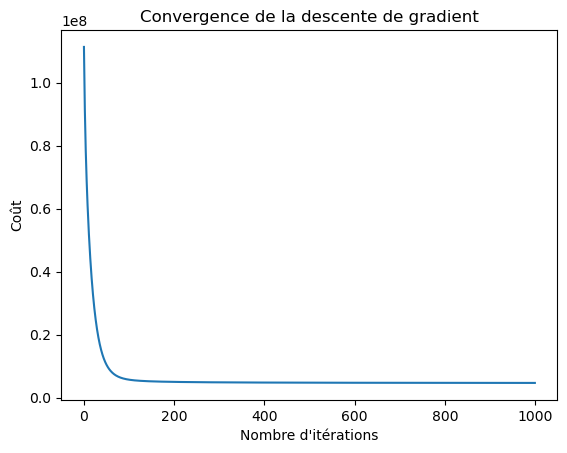

In [381]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()
